In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Madedata1.csv')

In [3]:
df.shape

(2499, 12)

In [4]:
df.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [5]:
# checking for missing values in data
df.isna().sum()

Country                       0
Age                           0
Gender                        0
fever                         0
Bodypain                      0
Runny_nose                    0
Difficulty_in_breathing       0
Nasal_congestion              0
Sore_throat                   0
Severity                      0
Contact_with_covid_patient    0
Infected                      0
dtype: int64

In [6]:
pd.value_counts(df['Gender'])

Male           1257
Female         1208
Transgender      34
Name: Gender, dtype: int64

In [7]:
pd.value_counts(df['Severity'])

Mild        1591
Moderate     525
Severe       383
Name: Severity, dtype: int64

In [8]:
pd.value_counts(df['Contact_with_covid_patient'])

No           1203
Yes           638
Not known     633
yes            25
Name: Contact_with_covid_patient, dtype: int64

In [9]:
df['Contact_with_covid_patient'] = df['Contact_with_covid_patient'].str.lower()

In [10]:
pd.value_counts(df['Contact_with_covid_patient'])

no           1203
yes           663
not known     633
Name: Contact_with_covid_patient, dtype: int64

In [11]:
gender = df['Gender']

genderLabel = LabelEncoder()
gender = genderLabel.fit_transform(df['Gender'])

In [12]:
gender

array([1, 1, 2, ..., 0, 0, 0])

In [16]:
genderOneHot = OneHotEncoder()
gender = genderOneHot.fit_transform(gender.reshape(-1,1)).toarray()

In [17]:
gender

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [18]:
severity = df['Severity']

severityLabel = LabelEncoder()
severity = severityLabel.fit_transform(severity)

severityOneHot = OneHotEncoder()
severity = severityOneHot.fit_transform(severity.reshape(-1,1)).toarray()

In [19]:
contact = df['Contact_with_covid_patient']

contactLabel = LabelEncoder()
contact = contactLabel.fit_transform(contact)

contactOneHot = OneHotEncoder()
contact = contactOneHot.fit_transform(contact.reshape(-1,1)).toarray()

In [20]:
severity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [21]:
contact

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
df.drop(columns=['Country','Gender','Severity','Contact_with_covid_patient'],
       inplace=True)

In [23]:
df.head()

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
0,10,102,1,0,0,0,1,0
1,20,103,1,1,0,0,0,1
2,55,99,0,0,0,1,1,0
3,37,100,0,1,1,0,0,1
4,45,101,1,1,1,1,0,1


In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [25]:
X = np.c_[X, gender, severity, contact]

In [26]:
X[0]

array([ 10., 102.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
         0.,   0.,   1.,   0.,   0.])

In [27]:
st = StandardScaler()
X = st.fit_transform(X)

In [28]:
X[0]

array([-1.93214208,  0.82660093,  0.73015672, -0.64611936, -0.9688716 ,
       -0.94205214,  0.98058068, -0.9673204 ,  0.99401551, -0.11744404,
        0.75545367, -0.51571062, -0.42544317,  1.03793388, -0.58243308,
       -0.60092521])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred = logistic.predict(x_test)

In [32]:
accuracy_score(y_test, y_pred)

0.9408

In [33]:
confusion_matrix(y_test, y_pred)

array([[279,  24],
       [ 13, 309]], dtype=int64)

In [34]:
279 + 309

588

In [35]:
24 + 13

37

In [36]:
(279 + 309) / (279 + 24 + 13 + 309)

0.9408

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       303
           1       0.93      0.96      0.94       322

    accuracy                           0.94       625
   macro avg       0.94      0.94      0.94       625
weighted avg       0.94      0.94      0.94       625



In [38]:
from sklearn.metrics import plot_confusion_matrix

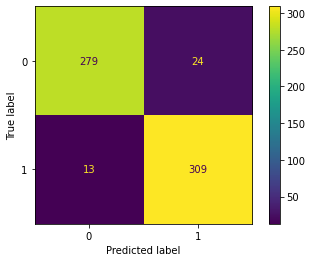

In [39]:
plot_confusion_matrix(logistic, x_test, y_test)
plt.show()

In [40]:
# Pickle - Data Serialization

In [41]:
file = open('model.pkl', 'wb')
pkl.dump(logistic, file)
file.close()

In [42]:
logistic.intercept_

array([0.06951429])

In [43]:
logistic.coef_

array([[ 0.56141801,  0.09126254,  1.81411758, -0.23285151,  1.10747319,
         0.18954215, -0.29266843, -0.0478319 ,  0.07314407, -0.10935729,
         0.07902213,  0.1469731 , -0.27170524, -1.74573141,  0.16191748,
         1.81619468]])

In [44]:
df.columns

Index(['Age', 'fever', 'Bodypain', 'Runny_nose', 'Difficulty_in_breathing',
       'Nasal_congestion', 'Sore_throat', 'Infected'],
      dtype='object')

In [46]:
age = int(input("Enter your age : "))
gender = input("Enter your gender : ")
fever = int(input("Do you have fever : 1 => Yes / 0 => No : "))
body_pain = int(input("Do you have body pain : 1 => Yes / 0 => No : "))
runny_nose = int(input("Do you have runny nose : 1 => Yes / 0 => No : "))
diff = int(input("Do you have difficulty in breathing : 1 => Yes / 0 => No : "))
nasal = int(input("Do you have nasal congestion : 1 => Yes / 0 => No : "))
sore = int(input("Do you have sore throat : 1 => Yes / 0 => No : "))
severity = input("What's the severity level : Mild / Moderate / Severe : ")
contact = input("You was in contact with any covid patient : Yes / No / Not Known  : ")

Enter your age : 50
Enter your gender : Male
Do you have fever : 1 => Yes / 0 => No : 1
Do you have body pain : 1 => Yes / 0 => No : 0
Do you have runny nose : 1 => Yes / 0 => No : 0
Do you have difficulty in breathing : 1 => Yes / 0 => No : 1
Do you have nasal congestion : 1 => Yes / 0 => No : 0
Do you have sore throat : 1 => Yes / 0 => No : 0
What's the severity level : Mild / Moderate / Severe : Mild
You was in contact with any covid patient : Yes / No / Not Known  : yes


In [53]:
gender = genderOneHot.transform([genderLabel.transform([gender])]).toarray()

In [54]:
severity = severityOneHot.transform([severityLabel.transform([severity])]).toarray()

In [55]:
contact = contactOneHot.transform([contactLabel.transform([contact])]).toarray()

In [62]:
testX = np.array([[age, fever, body_pain, runny_nose, diff, nasal, sore]])

In [63]:
testX

array([[50,  1,  0,  0,  1,  0,  0]])

In [64]:
testX = np.c_[testX, gender, severity, contact]

In [65]:
testX

array([[50.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.]])

In [66]:
testX = st.transform(testX)

In [67]:
logistic.predict(testX)

array([0], dtype=int64)